# Bike sharing case study

### Problem statement:

You are required to model the demand for shared bikes with the available independent variables.
It will be used by the management to understand how exactly the demands vary with different features. 
They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Step 1: Reading and understanding the data

 #### Importing the libraries

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [47]:
bikeshare= pd.read_csv('day.csv')
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [48]:
bikeshare.shape

(730, 16)

In [49]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [50]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Checking the values of categorical variables

In [51]:
bikeshare['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [52]:
bikeshare['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [53]:
bikeshare['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [54]:
bikeshare['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [55]:
bikeshare['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

mapping all the categorical data to meaningful names for visualization purpose

In [56]:
def year_map(x):
    return x.map(
    { 0: '2018', 1:'2019'})

bikeshare[['yr']]=bikeshare[['yr']].apply(year_map)

In [57]:
def season_map(x):
    return x.map(
    { 1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikeshare[['season']]=bikeshare[['season']].apply(season_map)

In [58]:
def month_map(x):
    return x.map(
    {1 : "Jan", 2 : "Feb",3 : "Mar", 4 : "Apr",5 : "May", 6 : "Jun",7 : "Jul", 8 : "Aug",9 : "Sep", 10 : "Oct",11:"Nov",12:"Dec" })

bikeshare[['mnth']]=bikeshare[['mnth']].apply(month_map)

In [59]:
def holiday_map(x):
    return x.map(
    { 1:'Holiday', 0:'Non Holiday'})

bikeshare[['holiday']]=bikeshare[['holiday']].apply(holiday_map)

In [60]:
def weekday_map(x):
    return x.map(
    { 1: "wed",
      2: "thur",
      3:"fri",
      4: "sat",
      5: "sun",
      6: "mon",
      0: "tue"})

bikeshare[['weekday']]=bikeshare[['weekday']].apply(weekday_map)

In [61]:
def workingday_map(x):
    return x.map(
    { 1:'Working', 0:'Non-Working'})

bikeshare[['workingday']]=bikeshare[['workingday']].apply(workingday_map)

In [62]:
def weathersit_map(x):
    return x.map(
    { 1:'clear', 2:'mist', 3:'rain', 4:'storm'})

bikeshare[['weathersit']]=bikeshare[['weathersit']].apply(weathersit_map)

In [63]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,Non Holiday,wed,Working,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,Non Holiday,thur,Working,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,Non Holiday,fri,Working,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,Non Holiday,sat,Working,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,Non Holiday,sun,Working,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [65]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


## Step 2:  Data visualization of numerical and categorical variables

Visualization of numerical variables

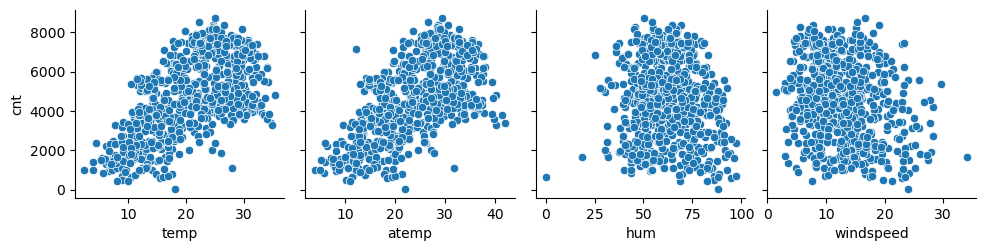

In [69]:
sns.pairplot(data= bikeshare,y_vars=['cnt'],x_vars=['temp','atemp','hum','windspeed'])

<Axes: >

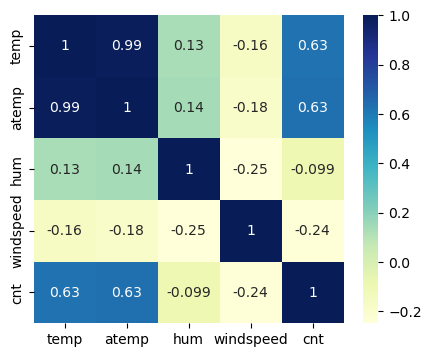

In [70]:
plt.figure(figsize=(5,4))
sns.heatmap(bikeshare[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')

In [67]:
bikeshare_cat = bikeshare.select_dtypes(include=['object'])
bikeshare_cat

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit
0,01-01-2018,spring,2018,Jan,Non Holiday,wed,Working,mist
1,02-01-2018,spring,2018,Jan,Non Holiday,thur,Working,mist
2,03-01-2018,spring,2018,Jan,Non Holiday,fri,Working,clear
3,04-01-2018,spring,2018,Jan,Non Holiday,sat,Working,clear
4,05-01-2018,spring,2018,Jan,Non Holiday,sun,Working,clear
...,...,...,...,...,...,...,...,...
725,27-12-2019,spring,2019,Dec,Non Holiday,sun,Working,mist
726,28-12-2019,spring,2019,Dec,Non Holiday,mon,Non-Working,mist
727,29-12-2019,spring,2019,Dec,Non Holiday,tue,Non-Working,mist
728,30-12-2019,spring,2019,Dec,Non Holiday,wed,Working,clear


Visualization of categorical variables

<Axes: xlabel='season', ylabel='cnt'>

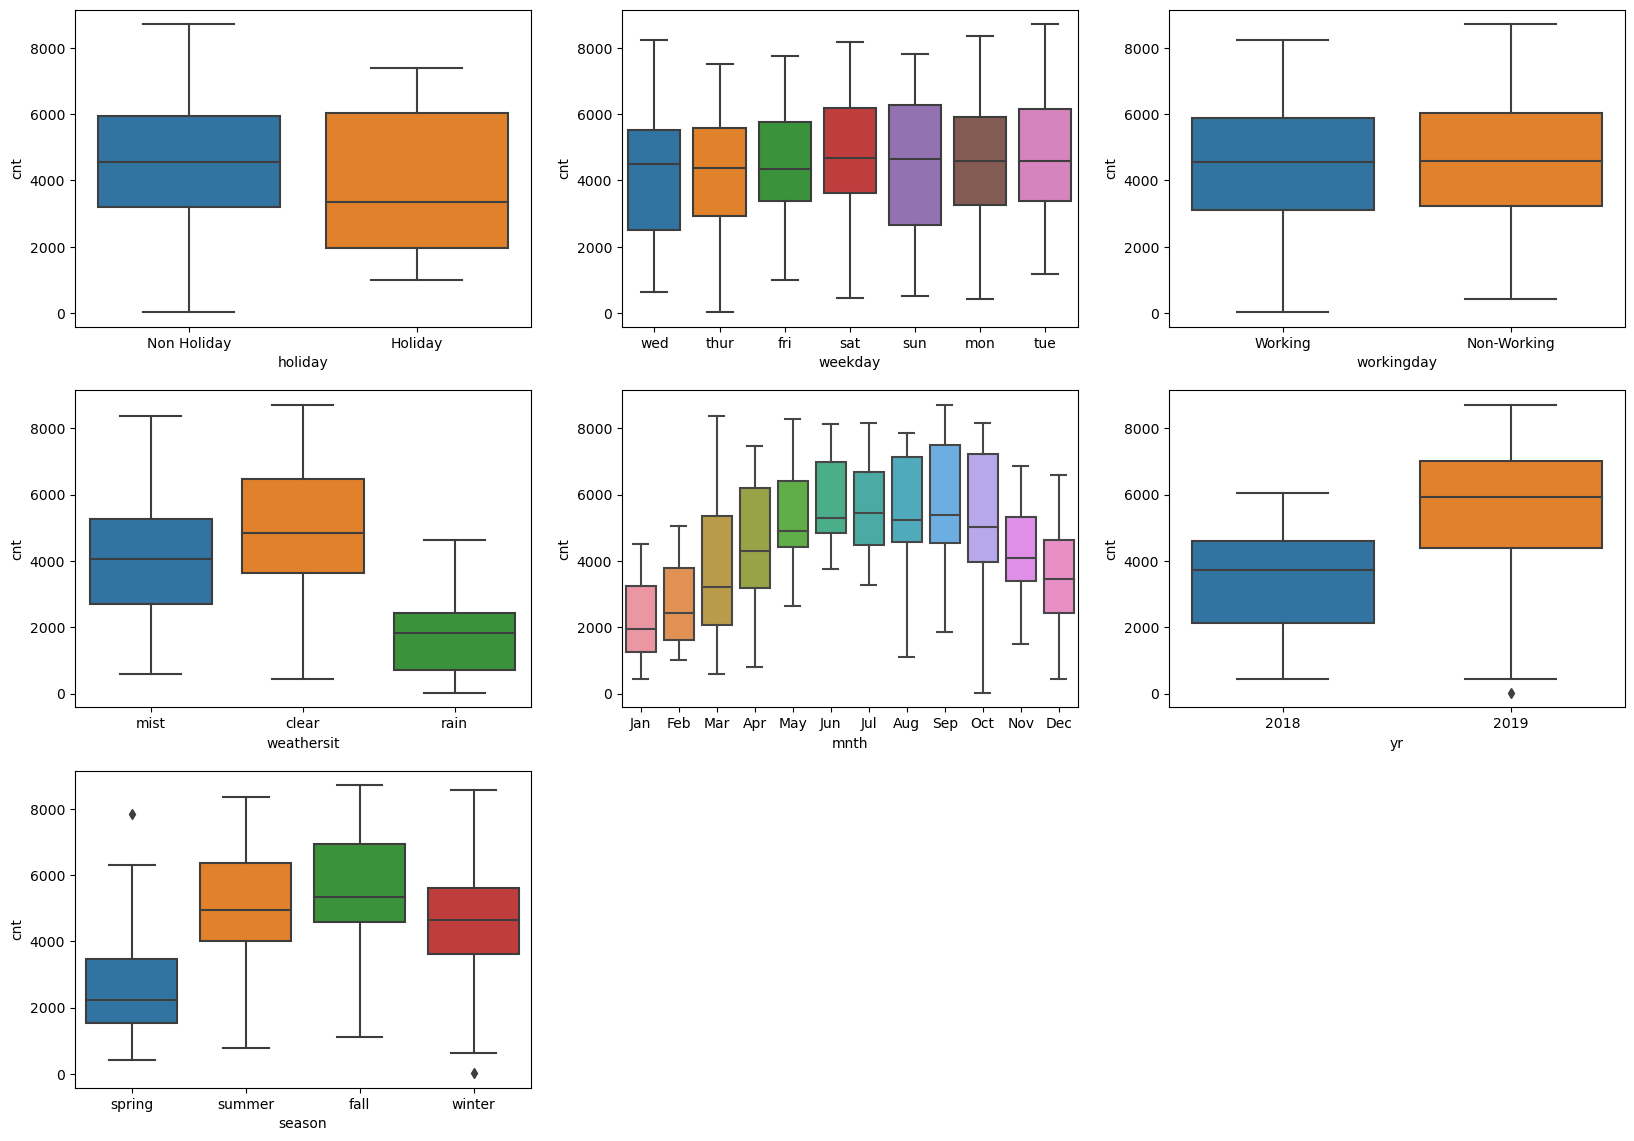

In [68]:
plt.figure(figsize=(20,14))
plt.subplot(3,3,1)
sns.boxplot(x='holiday',y='cnt',data= bikeshare)
plt.subplot(3,3,2)
sns.boxplot(x='weekday',y='cnt',data= bikeshare)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data= bikeshare)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data= bikeshare)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data= bikeshare)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data= bikeshare)
plt.subplot(3,3,7)
sns.boxplot(x='season',y='cnt',data= bikeshare)


## Step 3:Data preperation
#### (Dropping unwanted columns,creating dummy vraiables etc)

In [71]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,Non Holiday,wed,Working,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,Non Holiday,thur,Working,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,Non Holiday,fri,Working,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,Non Holiday,sat,Working,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,Non Holiday,sun,Working,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dropping unwanted columns which has no significance like dteday,instant(just for indexing),casual and registered as cnt is 
already present as target variable which is the sum of both.

In [72]:
bikeshare_new = bikeshare.drop(columns=['dteday','instant','casual','registered'])

In [73]:
bikeshare_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,Non Holiday,wed,Working,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,Non Holiday,thur,Working,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,Non Holiday,fri,Working,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,Non Holiday,sat,Working,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,Non Holiday,sun,Working,clear,9.305237,11.46350,43.6957,12.522300,1600


Creating dummy variables for teh categorical variables

In [74]:
bikeshare_new= pd.get_dummies(bikeshare_new,drop_first=True,dtype=int)

In [75]:
bikeshare_new.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Non Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,workingday_Working,weathersit_mist,weathersit_rain
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


## Step 4: Creating Training and Testing data 

In [76]:
df_train,df_test=train_test_split(bikeshare_new,train_size=.70,random_state=100)

In [77]:
df_train.shape

(510, 30)

In [78]:
df_test.shape

(220, 30)

### Scaling the numerical variables using Minmax scaler

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [80]:
numvars=['temp','atemp','hum','windspeed','cnt']
df_train[numvars]= scaler.fit_transform(df_train[numvars])

In [81]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Non Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,workingday_Working,weathersit_mist,weathersit_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,...,0.974510,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.711765,0.345098,0.029412
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,...,0.157763,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.453386,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Non Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,workingday_Working,weathersit_mist,weathersit_rain
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


### Creating X_train and y_train

In [83]:
y_train= df_train.pop('cnt')

In [84]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [85]:
X_train = df_train

In [86]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Non Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,workingday_Working,weathersit_mist,weathersit_rain
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,1,...,1,0,0,0,0,0,1,1,0,0
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


## Step 5: Model Building

### Feature selection using RFE

In [87]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [88]:
rfe= RFE(lm, step= 15)
rfe= rfe.fit(X_train,y_train)

In [89]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('holiday_Non Holiday', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thur', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('workingday_Working', True, 1),
 ('weathersit_mist', True, 1),
 ('weathersit_rain', True, 1)]

In [90]:
cols= X_train.columns[rfe.support_]
cols

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Jan', 'mnth_Sep', 'holiday_Non Holiday', 'weekday_mon',
       'workingday_Working', 'weathersit_mist', 'weathersit_rain'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jul',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_sat', 'weekday_sun', 'weekday_thur', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [92]:
X_train_rfe = X_train[cols]


### Building model using statsmodel to view the statistics

In [93]:
X_train_sm= sm.add_constant(X_train_rfe)
lm_1= sm.OLS(y_train,X_train_sm).fit()


#### Model 1

In [94]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          7.72e-187
Time:                        19:21:13   Log-Likelihood:                 506.73
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     495   BIC:                            -920.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1467      0.038      3.891      0.000       0.073       0.221
temp                    0.5760      0.130      4.433      0.000       0.321       0.831
atemp                  -0.0357      0.138     -0.258      0.796      -0.308       0.236
hum                    -0.1633      0.038     -4.307      0.000      -0.238      -0.089
windspeed              -0.1930      0.026     -7.327      0.000      -0.245      -0.141
season_summer           0.0856      0.011      8.005      0.000       0.065       0.107
season_winter           0.1301      0.012     11.270      0.000       0.107       0.153
yr_2019                 0.2298      0.008     28.098      0.000       0.214       0.246
mnth_Jan               -0.0393      0.018     -2.224      0.027      -0.074      -0.005
mnth_Sep                0.1045      0.016      6.668      0.000       0.074       0.135
holiday_Non Holiday     0.1132      0.027      4.129      0.000       0.059       0.167
weekday_mon            -0.0065      0.016     -0.416      0.677      -0.037       0.024
workingday_Working     -0.0216      0.012     -1.801      0.072      -0.045       0.002
weathersit_mist        -0.0530      0.011     -5.000      0.000      -0.074      -0.032
weathersit_rain        -0.2408      0.027     -9.048      0.000      -0.293      -0.188
==============================================================================
Omnibus:                       67.705   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.232
Skew:                          -0.752   Prob(JB):                     1.59e-30
Kurtosis:                       5.049   Cond. No.                         95.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating the VIF

In [97]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,atemp,363.58
0,temp,353.71
9,holiday_Non Holiday,27.88
2,hum,27.21
11,workingday_Working,6.29
3,windspeed,4.48
12,weathersit_mist,2.22
6,yr_2019,2.07
5,season_winter,1.98
10,weekday_mon,1.94


#### Dropping atemp  as it has very high p value and hogh VIF making it less significant

In [98]:
X_train_rfe = X_train_rfe.drop(['atemp'],axis=1)

In [99]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_2= sm.OLS(y_train,X_train_sm).fit()

#### Model 2

In [100]:

lm_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.52e-188
Time:                        19:25:35   Log-Likelihood:                 506.70
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     496   BIC:                            -926.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1464      0.038      3.889      0.000       0.072       0.220
temp                    0.5430      0.023     23.254      0.000       0.497       0.589
hum                    -0.1639      0.038     -4.333      0.000      -0.238      -0.090
windspeed              -0.1918      0.026     -7.411      0.000      -0.243      -0.141
season_summer           0.0852      0.011      8.058      0.000       0.064       0.106
season_winter           0.1297      0.011     11.345      0.000       0.107       0.152
yr_2019                 0.2298      0.008     28.127      0.000       0.214       0.246
mnth_Jan               -0.0392      0.018     -2.222      0.027      -0.074      -0.005
mnth_Sep                0.1044      0.016      6.671      0.000       0.074       0.135
holiday_Non Holiday     0.1130      0.027      4.126      0.000       0.059       0.167
weekday_mon            -0.0062      0.016     -0.400      0.689      -0.037       0.024
workingday_Working     -0.0216      0.012     -1.804      0.072      -0.045       0.002
weathersit_mist        -0.0529      0.011     -4.999      0.000      -0.074      -0.032
weathersit_rain        -0.2403      0.027     -9.062      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       68.136   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.197
Skew:                          -0.756   Prob(JB):                     9.79e-31
Kurtosis:                       5.054   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,holiday_Non Holiday,27.76
1,hum,27.01
0,temp,10.84
10,workingday_Working,6.29
2,windspeed,4.32
11,weathersit_mist,2.22
5,yr_2019,2.07
4,season_winter,1.95
9,weekday_mon,1.93
3,season_summer,1.70


#### Dropping weekday_mon  as it has very high p value

In [102]:
X_train_rfe = X_train_rfe.drop(['weekday_mon'],axis=1)

In [103]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_3= sm.OLS(y_train,X_train_sm).fit()

#### Model 3

In [104]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.96e-189
Time:                        19:32:45   Log-Likelihood:                 506.62
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     497   BIC:                            -932.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1460      0.038      3.882      0.000       0.072       0.220
temp                    0.5428      0.023     23.270      0.000       0.497       0.589
hum                    -0.1639      0.038     -4.337      0.000      -0.238      -0.090
windspeed              -0.1916      0.026     -7.411      0.000      -0.242      -0.141
season_summer           0.0851      0.011      8.058      0.000       0.064       0.106
season_winter           0.1296      0.011     11.348      0.000       0.107       0.152
yr_2019                 0.2299      0.008     28.173      0.000       0.214       0.246
mnth_Jan               -0.0393      0.018     -2.232      0.026      -0.074      -0.005
mnth_Sep                0.1044      0.016      6.677      0.000       0.074       0.135
holiday_Non Holiday     0.1104      0.027      4.150      0.000       0.058       0.163
workingday_Working     -0.0185      0.009     -2.004      0.046      -0.037      -0.000
weathersit_mist        -0.0528      0.011     -4.995      0.000      -0.074      -0.032
weathersit_rain        -0.2407      0.026     -9.091      0.000      -0.293      -0.189
==============================================================================
Omnibus:                       67.023   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.283
Skew:                          -0.746   Prob(JB):                     4.20e-30
Kurtosis:                       5.034   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,26.99
8,holiday_Non Holiday,24.94
0,temp,10.83
2,windspeed,4.32
9,workingday_Working,3.77
10,weathersit_mist,2.22
5,yr_2019,2.06
4,season_winter,1.95
3,season_summer,1.70
6,mnth_Jan,1.60


#### Dropping workingday_Working as it is insignificant compared to other variables

In [106]:
X_train_rfe = X_train_rfe.drop(['workingday_Working'],axis=1)

#### Model 4

In [107]:
X_train_sm = sm.add_constant(X_train_rfe)
lm_4= sm.OLS(y_train,X_train_sm).fit()

In [108]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.85e-189
Time:                        19:33:33   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     498   BIC:                            -934.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1488      0.038      3.948      0.000       0.075       0.223
temp                    0.5443      0.023     23.277      0.000       0.498       0.590
hum                    -0.1694      0.038     -4.480      0.000      -0.244      -0.095
windspeed              -0.1925      0.026     -7.425      0.000      -0.243      -0.142
season_summer           0.0844      0.011      7.970      0.000       0.064       0.105
season_winter           0.1288      0.011     11.248      0.000       0.106       0.151
yr_2019                 0.2299      0.008     28.085      0.000       0.214       0.246
mnth_Jan               -0.0394      0.018     -2.229      0.026      -0.074      -0.005
mnth_Sep                0.1048      0.016      6.682      0.000       0.074       0.136
holiday_Non Holiday     0.0966      0.026      3.747      0.000       0.046       0.147
weathersit_mist        -0.0505      0.011     -4.789      0.000      -0.071      -0.030
weathersit_rain        -0.2385      0.027     -8.988      0.000      -0.291      -0.186
==============================================================================
Omnibus:                       61.185   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.644
Skew:                          -0.680   Prob(JB):                     3.16e-28
Kurtosis:                       5.028   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,26.89
8,holiday_Non Holiday,22.57
0,temp,10.81
2,windspeed,4.32
9,weathersit_mist,2.19
5,yr_2019,2.06
4,season_winter,1.94
3,season_summer,1.70
6,mnth_Jan,1.60
7,mnth_Sep,1.22


### Dropping mnth_Jan

In [110]:
X_train_rfe = X_train_rfe.drop(['mnth_Jan'],axis=1)

In [111]:
X_train_sm= sm.add_constant(X_train_rfe)
lm_5=sm.OLS(y_train,X_train_sm).fit()


#### Model 5

In [112]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.32e-189
Time:                        19:34:48   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1287      0.037      3.502      0.001       0.056       0.201
temp                    0.5708      0.020     28.208      0.000       0.531       0.611
hum                    -0.1756      0.038     -4.639      0.000      -0.250      -0.101
windspeed              -0.1870      0.026     -7.217      0.000      -0.238      -0.136
season_summer           0.0907      0.010      8.847      0.000       0.071       0.111
season_winter           0.1391      0.011     13.239      0.000       0.118       0.160
yr_2019                 0.2289      0.008     27.895      0.000       0.213       0.245
mnth_Sep                0.1069      0.016      6.802      0.000       0.076       0.138
holiday_Non Holiday     0.0975      0.026      3.766      0.000       0.047       0.148
weathersit_mist        -0.0503      0.011     -4.754      0.000      -0.071      -0.030
weathersit_rain        -0.2353      0.027     -8.848      0.000      -0.288      -0.183
==============================================================================
Omnibus:                       60.193   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.461
Skew:                          -0.670   Prob(JB):                     9.41e-28
Kurtosis:                       5.015   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating the VIF for model lm_5

In [113]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,25.10
7,holiday_Non Holiday,21.70
0,temp,8.34
2,windspeed,4.32
8,weathersit_mist,2.18
5,yr_2019,2.05
4,season_winter,1.66
3,season_summer,1.58
6,mnth_Sep,1.21
9,weathersit_rain,1.19


### Dropping hum variable as it has high VIF

In [114]:
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

#### Model 6 

In [115]:
X_train_sm= sm.add_constant(X_train_rfe)
lm_6=sm.OLS(y_train,X_train_sm).fit()

In [116]:
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.83e-186
Time:                        19:37:42   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0272      0.030      0.904      0.366      -0.032       0.086
temp                    0.5480      0.020     27.360      0.000       0.509       0.587
windspeed              -0.1532      0.025     -6.039      0.000      -0.203      -0.103
season_summer           0.0881      0.010      8.437      0.000       0.068       0.109
season_winter           0.1293      0.011     12.314      0.000       0.109       0.150
yr_2019                 0.2329      0.008     27.962      0.000       0.216       0.249
mnth_Sep                0.1012      0.016      6.330      0.000       0.070       0.133
holiday_Non Holiday     0.0987      0.026      3.738      0.000       0.047       0.151
weathersit_mist        -0.0784      0.009     -8.844      0.000      -0.096      -0.061
weathersit_rain        -0.2829      0.025    -11.295      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_Non Holiday,12.27
0,temp,6.99
1,windspeed,4.31
4,yr_2019,2.05
2,season_summer,1.58
7,weathersit_mist,1.57
3,season_winter,1.51
5,mnth_Sep,1.20
8,weathersit_rain,1.08


### Dropping holiday_Non Holiday variable as it has high VIF

In [119]:
X_train_rfe = X_train_rfe.drop(['holiday_Non Holiday'],axis=1)

### Model 7 (Final Model)

In [122]:
X_train_sm= sm.add_constant(X_train_rfe)
lm_7=sm.OLS(y_train,X_train_sm).fit()

In [123]:
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.53e-184
Time:                        19:40:22   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1209      0.017      7.140      0.000       0.088       0.154
temp                0.5527      0.020     27.295      0.000       0.513       0.592
windspeed          -0.1552      0.026     -6.041      0.000      -0.206      -0.105
season_summer       0.0894      0.011      8.460      0.000       0.069       0.110
season_winter       0.1281      0.011     12.051      0.000       0.107       0.149
yr_2019             0.2332      0.008     27.645      0.000       0.217       0.250
mnth_Sep            0.0978      0.016      6.052      0.000       0.066       0.130
weathersit_mist    -0.0767      0.009     -8.553      0.000      -0.094      -0.059
weathersit_rain    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.03
4,yr_2019,2.00
2,season_summer,1.57
6,weathersit_mist,1.48
3,season_winter,1.37
5,mnth_Sep,1.20
7,weathersit_rain,1.08


#### No we have both Pvalue and VIF s in acceptable range. Rsquared and Adjusted values are also very close by and high values.
#### So we can finalize Model 7 (lm_7 model )and make predictions using this

## Step 6:  Residual Analysis 

In [125]:
y_train_pred = lm_7.predict(X_train_sm)

In [126]:
y_train_pred.head()

576    0.763503
426    0.482267
728    0.386608
482    0.556221
111    0.265631
dtype: float64

In [127]:
res= y_train-y_train_pred
res.head()

576    0.064155
426   -0.017011
728   -0.182512
482   -0.073249
111   -0.074536
dtype: float64

Text(0.5, 0.98, 'Error term')

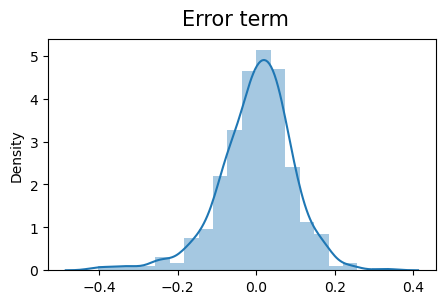

In [128]:
plt.figure(figsize=(5,3))
sns.distplot(res,bins=20)
plt.suptitle("Error term",fontsize=15)

## Step 7: Model Prediction using the final Model 7

#### Scaling the numerical variables in test data

In [129]:
numvars=['temp','atemp','hum','windspeed','cnt']
df_test[numvars]= scaler.transform(df_test[numvars])

In [130]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_Non Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,workingday_Working,weathersit_mist,weathersit_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,0.059091,...,0.963636,0.172727,0.140909,0.131818,0.122727,0.154545,0.118182,0.640909,0.318182,0.027273
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,0.236333,...,0.187620,0.378873,0.348721,0.339064,0.328872,0.362295,0.323559,0.480828,0.466833,0.163248
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creating X and y test data

In [131]:
y_test = df_test.pop('cnt')

In [132]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [133]:
X_test= df_test

In [134]:
X_test.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Non Holiday,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,workingday_Working,weathersit_mist,weathersit_rain
184,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
221,0.881625,0.795343,0.437098,0.339570,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [135]:
X_train_rfe.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Sep', 'weathersit_mist', 'weathersit_rain'],
      dtype='object')

In [136]:
X_test_new= X_test[X_train_rfe.columns]

In [137]:
X_test_sm= sm.add_constant(X_test_new)

In [138]:
y_test_pred = lm_7.predict(X_test_sm)

In [139]:
y_test_pred.head()

184    0.490865
535    0.917756
299    0.403455
221    0.555443
152    0.578553
dtype: float64

## Step 8: Evaluation of the Model

#### R squared calculation for test data

In [140]:
r_squared= r2_score(y_true=y_test,y_pred=y_test_pred)
r_squared

0.7907818070220923

In [141]:
r_squared= r2_score(y_true=y_train,y_pred=y_train_pred)
r_squared

0.825604317961911

r squared value for both test and train data remains very close  0.79 and 0.82 respectively.

Text(0, 0.5, 'y_test_pred')

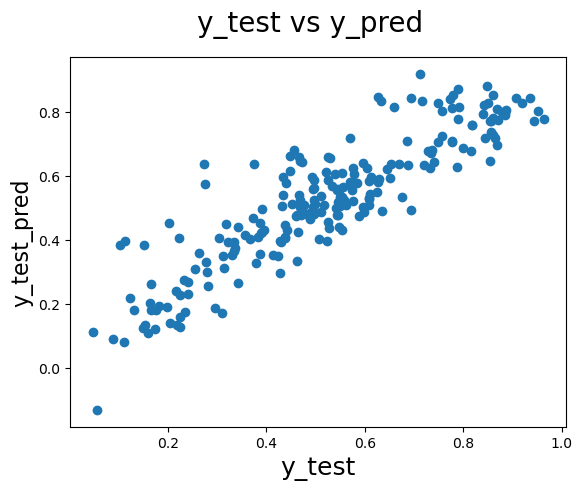

In [142]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)   

By looking at the final model and after analysing the coefficients of the predictor variables,

Temperature (temp) contributes significantly to the demand of shared bikes as it has a positive coefficient of 0.5527.

The year variable also contributes significantly as we have seen that the demand for bike rentals increases over the year. The year 2019 has a positive coefficient of 0.2332.

The weathersit_rain variable is negatively correlated with the demand for bike rentals as the weather becomes unfavourable during rainy season , the demand for bike rentals declines as expected. It has a negative coefficient of -.2785.

